<a href="https://colab.research.google.com/github/V4T5AV/197_DAV_ASSIGNMENT/blob/main/197_DAV_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Data Loading, Inspection & Cleaning
We began by loading the Ukrainian Mobile Phones dataset using pandas. The dataset contains various attributes such as brand, model, price, battery size, and screen size. After inspecting the dataset with .head(), .info(), and .isna().sum(), we performed basic cleaning:

Renamed key columns for simplicity.

Filled missing numeric values (like price, battery, and screen_size) using their respective medians.

Dropped rows with missing brand or model.

This step ensured the data was ready for analysis without inconsistencies or null values.

In [6]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Set visual styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 📁 Step 1: Load the dataset
df = pd.read_csv('phones_data.csv')
# 🔍 Step 2: Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isna().sum())

# 🧹 Step 3: Data Cleaning & Preprocessing

# ✅ Rename columns for easier access
df.rename(columns={
    'brand_name': 'brand',
    'model_name': 'model',
    'memory_size': 'storage',
    'battery_size': 'battery',
    'best_price': 'price',
    'release_date': 'release_year'
}, inplace=True)

# ✅ Fill missing numeric values with median
for col in ['price', 'storage', 'battery', 'screen_size']:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

# ✅ Drop rows with missing critical identifiers
df.dropna(subset=['brand', 'model'], inplace=True)

# 📌 Check cleaned data
print("\nCleaned data info:")
print(df.info())


First 5 rows of the dataset:
   Unnamed: 0 brand_name                                    model_name  \
0           0    ALCATEL          1 1/8GB Bluish Black (5033D-2JALUAA)   
1           1    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
2           2    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
3           3    ALCATEL  1 5033D 1/16GB Volcano Black (5033D-2LALUAF)   
4           4      Nokia                           1.3 1/16GB Charcoal   

        os  popularity  best_price  lowest_price  highest_price  \
0  Android         422      1690.0        1529.0         1819.0   
1  Android         323      1803.0        1659.0         2489.0   
2  Android         299      1803.0        1659.0         2489.0   
3  Android         287      1803.0        1659.0         2489.0   
4  Android        1047      1999.0           NaN            NaN   

   sellers_amount  screen_size  memory_size  battery_size release_date  
0              36         5.00          8.0       

<ipython-input-6-5893cc5a3072>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


 Part 2: Basic Analysis
We performed basic statistical operations using NumPy and Pandas:

Calculated mean, median, and standard deviation for numeric columns.

Identified high-end phones priced above 30,000 UAH.

Computed the average price per brand, giving an overview of market segmentation.

These operations provided initial insights into the price distribution and brand competitiveness.

In [7]:
# 📊 Step 4: Basic Statistics
print("\nBasic Statistics:")
print(f"Mean Price: {np.mean(df['price']):.2f} UAH")
print(f"Median Battery Capacity: {np.median(df['battery']):.2f} mAh")
print(f"Standard Deviation of Screen Size: {np.std(df['screen_size']):.2f} inches")

# 💰 Phones priced over 30,000 UAH
high_end = df[df['price'] > 30000]
print(f"\nNumber of phones priced above 30,000 UAH: {len(high_end)}")

# 💸 Average price per brand
avg_price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)
print("\nAverage price by brand (top 10):")
print(avg_price_brand.head(10))



Basic Statistics:
Mean Price: 7941.21 UAH
Median Battery Capacity: 3687.00 mAh
Standard Deviation of Screen Size: 1.48 inches

Number of phones priced above 30,000 UAH: 48

Average price by brand (top 10):
brand
Microsoft    44232.000000
Apple        21049.411765
ASUS         18013.545455
Samsung      15180.232143
Sony         14326.450000
OnePlus      13382.500000
Google       12478.166667
CAT          12352.571429
HTC          10399.000000
OPPO          9530.428571
Name: price, dtype: float64


Part 3: Pivot Tables
Two pivot tables were created:

Average price per OS showed how Android, iOS, and other operating systems differed in price.

Number of models per brand revealed which brands dominate the market in terms of variety.

These aggregations made it easy to compare key metrics across different categories.

In [8]:
# 📈 Average price by OS
pivot_os_price = pd.pivot_table(df, index='os', values='price', aggfunc='mean')
print("\nAverage phone price by OS:")
print(pivot_os_price)

# 🔢 Number of models per brand
pivot_brand_models = pd.pivot_table(df, index='brand', values='model', aggfunc='count')
print("\nNumber of phone models by brand:")
print(pivot_brand_models.sort_values(by='model', ascending=False).head(10))



Average phone price by OS:
                     price
os                        
Android        8009.955191
EMUI          31656.000000
KAIOS          1036.000000
OxygenOS       6612.666667
WindowsPhone   2600.000000
iOS           20869.611650

Number of phone models by brand:
              model
brand              
Samsung         168
Xiaomi          111
Apple           102
Motorola         62
Sigma mobile     52
HUAWEI           49
Nokia            48
DOOGEE           44
Blackview        42
Honor            33


Part 4: Visualization - Basic
We visualized the price distribution using a histogram. This revealed a right-skewed distribution, indicating that most phones are in a mid-to-low price range, with a few premium models pulling the average upward.



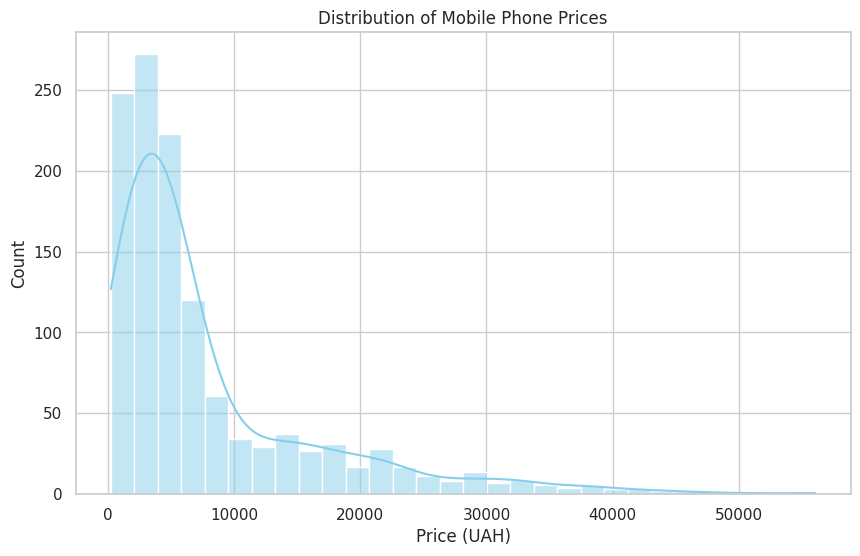

In [9]:
# 1️⃣ Price Distribution
plt.figure()
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mobile Phone Prices')
plt.xlabel('Price (UAH)')
plt.ylabel('Count')
plt.show()


Part 5: Visualization - Intermediate
We created two key plots:

A barplot of the top 10 brands by average price, highlighting premium brands like Apple.

A scatter plot of battery capacity vs price, showing a weak positive correlation and clustering among budget phones.

These visualizations helped identify trends in brand pricing and design tradeoffs.

<ipython-input-10-62e8b15969dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')


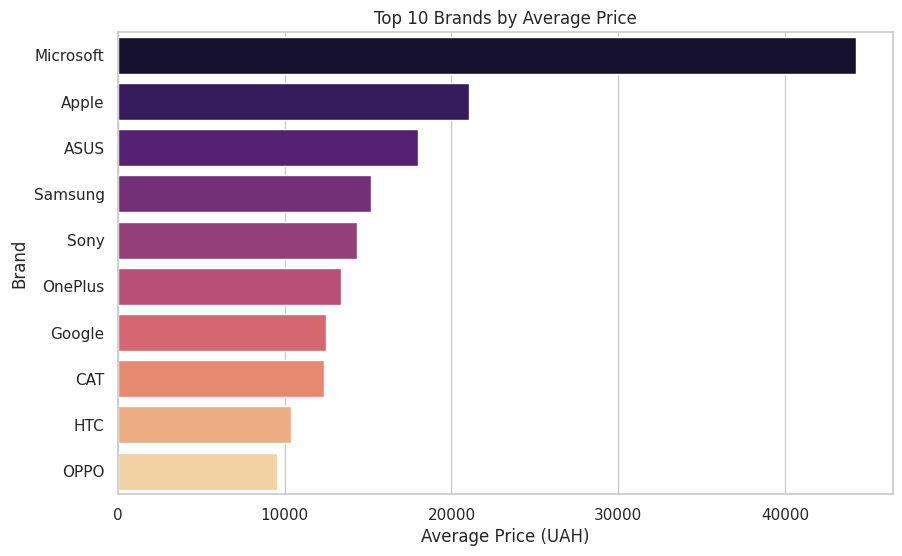

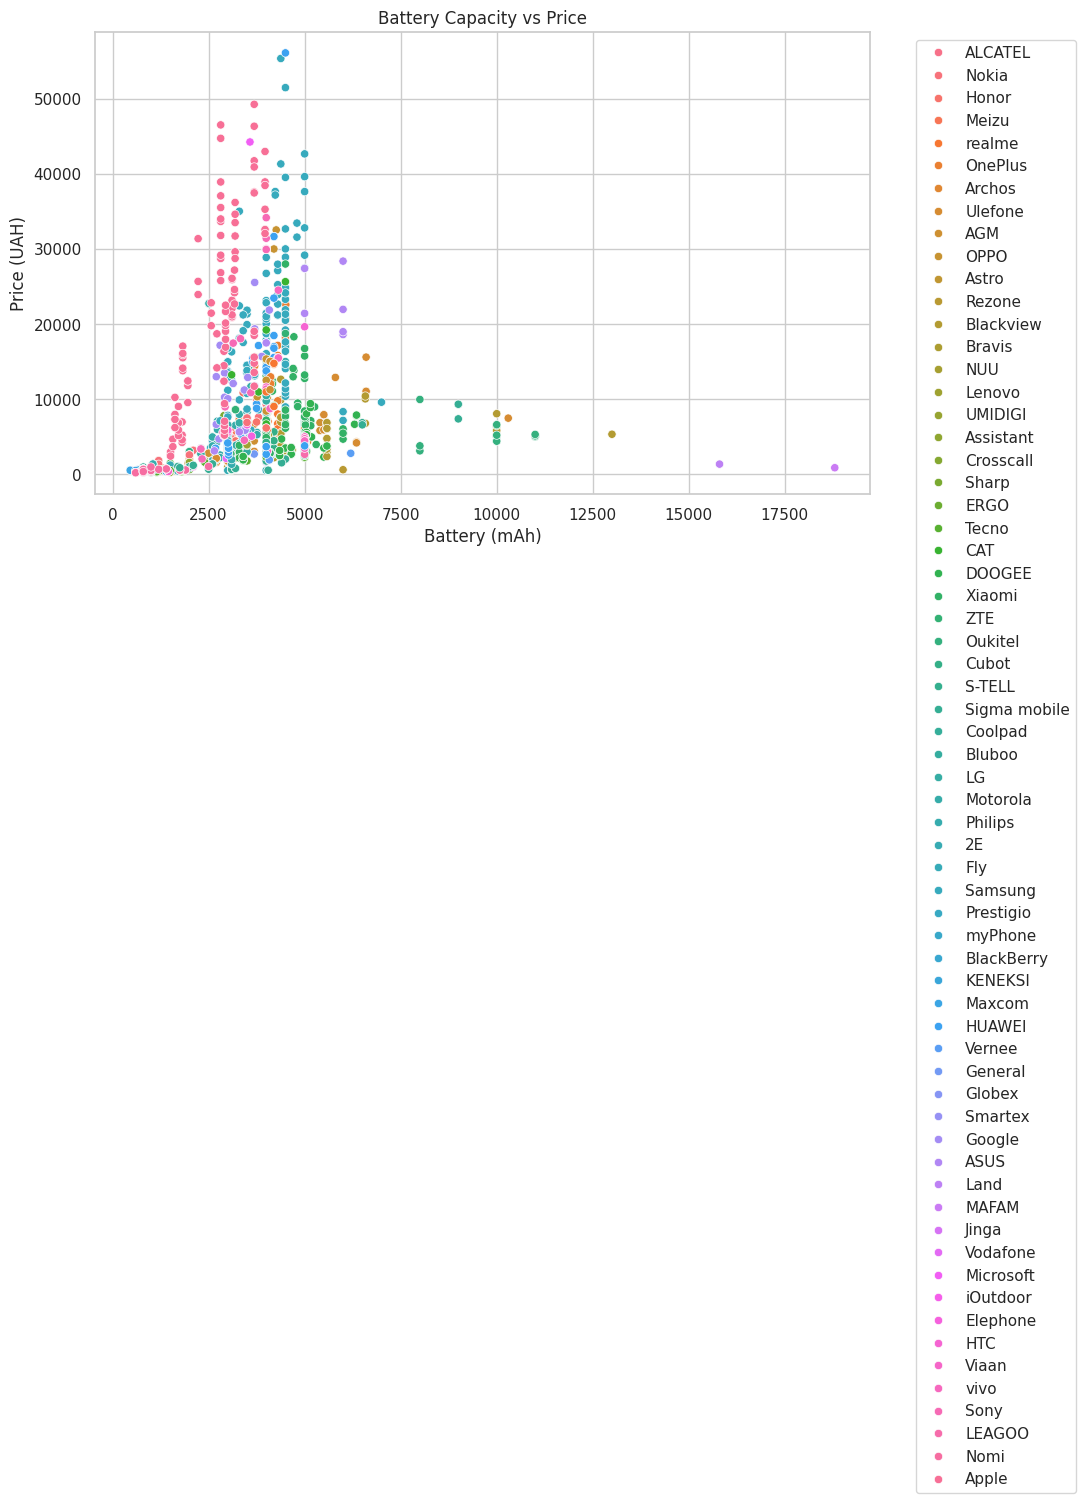

In [10]:
# 2️⃣ Average Price by Brand (Top 10)
plt.figure()
top_brands = avg_price_brand.head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette='magma')
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Average Price (UAH)')
plt.ylabel('Brand')
plt.show()

# 3️⃣ Battery vs Price Scatterplot
plt.figure()
sns.scatterplot(x='battery', y='price', hue='brand', data=df)
plt.title('Battery Capacity vs Price')
plt.xlabel('Battery (mAh)')
plt.ylabel('Price (UAH)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


 Part 6: Visualization - Count Plot
A countplot was used to show the number of phone models by OS. Unsurprisingly, Android dominated the market, followed by iOS. This gives a clear picture of OS popularity and diversity in the dataset.

<ipython-input-11-be98d6097513>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='os', data=df, order=df['os'].value_counts().index, palette='Set2')


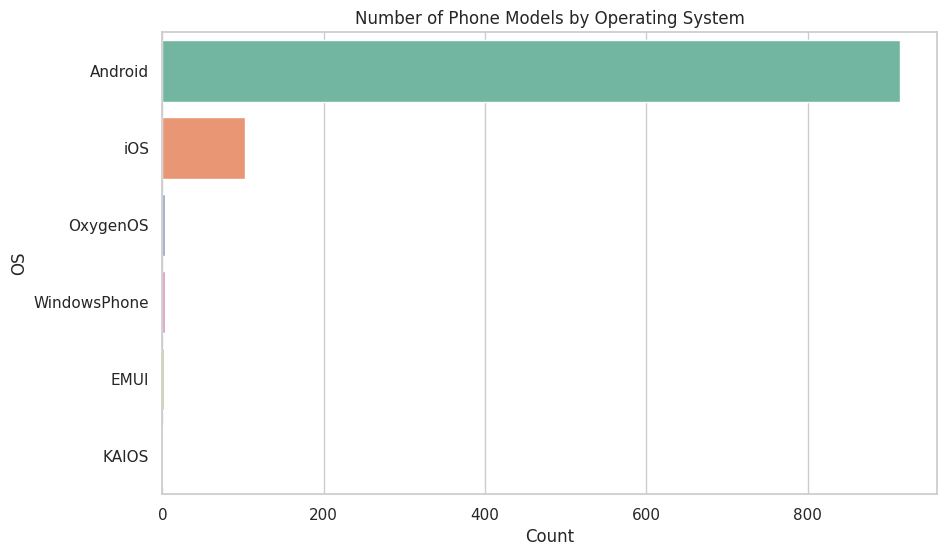

In [11]:
# 4️⃣ Count of Models by OS
plt.figure()
sns.countplot(y='os', data=df, order=df['os'].value_counts().index, palette='Set2')
plt.title('Number of Phone Models by Operating System')
plt.xlabel('Count')
plt.ylabel('OS')
plt.show()


Part 7: Advanced NumPy Operations
We normalized the storage column using z-scores to find phones with near-average storage capacity. Filtering with a z-score range of ±0.5 revealed how many phones offer typical internal memory, which is helpful for consumers seeking balanced performance.

In [12]:
# 📐 Normalize storage using Z-score
storage_mean = np.mean(df['storage'])
storage_std = np.std(df['storage'])
df['storage_zscore'] = (df['storage'] - storage_mean) / storage_std

# 📦 Filter phones with average-ish storage
avg_storage_phones = df[np.abs(df['storage_zscore']) < 0.5]
print(f"\nPhones with near-average storage (Z-score between -0.5 and 0.5): {len(avg_storage_phones)}")



Phones with near-average storage (Z-score between -0.5 and 0.5): 692
